In [62]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import ast
import numpy as np
from tabulate import tabulate
import warnings 
warnings.filterwarnings('ignore')

In [63]:
df1=pd.read_csv('DS_C14_Capstone_tmdb_5000_credits.csv')
df1

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [64]:
df2=pd.read_csv('DS_C14_Capstone_tmdb_5000_movies.csv')
df2

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",04-09-1992,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],26-12-2011,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",13-10-2013,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",03-05-2012,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


# Merging Dataframes

In [65]:
# Merging 2 differnt dataframe into single dataframe
movie_df=pd.merge(left=df1,right=df2,how='inner',left_on='movie_id',right_on='id')

# Dropping one of the common column
movie_df=movie_df.drop('movie_id',axis=1)
movie_df.head(2)

,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,overview,...,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title_y,vote_average,vote_count
0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [66]:
movie_df.isnull().sum()

title_x                    0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
status                     0
tagline                  844
title_y                    0
vote_average               0
vote_count                 0
dtype: int64

In [67]:
# Dropping Home page and tagline which is unique to all the movies
movie_df=movie_df.drop('homepage',axis=1)
movie_df=movie_df.drop('tagline',axis=1)

In [68]:
# print(movie_df.loc[movie_df.crew.apply(lambda x:x ==[])].index)

# Handling Json Column

In [69]:
# created a function to convert json to str(string) format
def json_to_string(row):
    json_data = json.loads(row)
    values=[data.get("name") for data in json_data]
    return values[:3] #or else[:1]

### Extracting Country name from production_countries

In [70]:
movie_df['countries'] = movie_df["production_countries"].apply(json_to_string)

In [71]:
# tmdb_df["genres_extract"] = tmdb_df["genres"].apply(json_to_string)
# tmdb_df["g1"] = tmdb_df["genres_extract"].apply(lambda x:x[0] if len(x)>1 else None)
movie_df["country"] = movie_df['countries'].apply(lambda x:x[0] if len(x)>=1 else None)

### Extracting Lead_Actor from cast column

In [72]:
movie_df['cast_def'] = movie_df["cast"].apply(json_to_string)
movie_df["Lead_Actor"] = movie_df['cast_def'].apply(lambda x:x[0] if len(x)>=1 else None)

### Extracting Second_Lead_Actor from cast column

In [73]:
movie_df["Second_Lead_Actor"] = movie_df['cast_def'].apply(lambda x:x[1] if len(x)>=2 else None)

### Extracting production_house from production_companies column

In [74]:
movie_df['company'] = movie_df["production_companies"].apply(json_to_string)
movie_df["Main_Production_House"] = movie_df['company'].apply(lambda x:x[0] if len(x)>=1 else None)

### Extracting Main Generes from genres

In [75]:
movie_df['g1'] = movie_df["genres"].apply(json_to_string)
movie_df["Genres"] = movie_df['g1'].apply(lambda x:x[0] if len(x)>=1 else None)

### Extracting Director name from crew

In [76]:
movie_df['crew'] = movie_df['crew'].apply(json.loads)
extract_director_names = lambda x: [person['name'] for person in x if person['job'] == 'Director']

movie_df['directors'] = movie_df['crew'].apply(extract_director_names)
movie_df["Director"] = movie_df['directors'].apply(lambda x:x[0] if len(x)>=1 else None)

In [77]:
# Dropping columns
drop_columns=['cast','crew','genres','keywords','production_companies','production_countries','overview']
movie_df = movie_df.drop(drop_columns, axis=1)

In [78]:
# picking the rows having []
# b=movie_df.loc[movie_df['crew'].apply(lambda x:x ==[])].index

In [79]:
movie_df = movie_df.reset_index()

In [80]:
movie_df.isnull().sum()

index                      0
title_x                    0
budget                     0
id                         0
original_language          0
popularity                 0
release_date               1
revenue                    0
runtime                    2
status                     0
title_y                    0
vote_average               0
vote_count                 0
countries                  0
country                  174
cast_def                   0
Lead_Actor                43
Second_Lead_Actor         53
company                    0
Main_Production_House    351
g1                         0
Genres                    28
directors                  0
Director                  30
dtype: int64

In [81]:
movie_df["runtime"].fillna(round(movie_df["runtime"].mean()),inplace=True)

In [82]:
movie_df=movie_df.dropna()

In [83]:
movie_df.isnull().sum()

index                    0
title_x                  0
budget                   0
id                       0
original_language        0
popularity               0
release_date             0
revenue                  0
runtime                  0
status                   0
title_y                  0
vote_average             0
vote_count               0
countries                0
country                  0
cast_def                 0
Lead_Actor               0
Second_Lead_Actor        0
company                  0
Main_Production_House    0
g1                       0
Genres                   0
directors                0
Director                 0
dtype: int64

In [84]:
drop_columns=['title_y','countries','cast_def','company','g1','directors','index','id','status']
movie_df = movie_df.drop(drop_columns, axis=1)

In [85]:
movie_df

,title_x,budget,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director
0,Avatar,237000000,en,150.437577,10-12-2009,2787965087,162.0,7.2,11800,United States of America,Sam Worthington,Zoe Saldana,Ingenious Film Partners,Action,James Cameron
1,Pirates of the Caribbean: At World's End,300000000,en,139.082615,19-05-2007,961000000,169.0,6.9,4500,United States of America,Johnny Depp,Orlando Bloom,Walt Disney Pictures,Adventure,Gore Verbinski
2,Spectre,245000000,en,107.376788,26-10-2015,880674609,148.0,6.3,4466,United Kingdom,Daniel Craig,Christoph Waltz,Columbia Pictures,Action,Sam Mendes
3,The Dark Knight Rises,250000000,en,112.312950,16-07-2012,1084939099,165.0,7.6,9106,United States of America,Christian Bale,Michael Caine,Legendary Pictures,Action,Christopher Nolan
4,John Carter,260000000,en,43.926995,07-03-2012,284139100,132.0,6.1,2124,United States of America,Taylor Kitsch,Lynn Collins,Walt Disney Pictures,Action,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,Bang,0,en,0.918116,09-09-1995,0,98.0,6.0,1,United States of America,Darling Narita,Peter Greene,Asylum Films,Drama,Ash Baron-Cohen
4796,Primer,7000,en,23.307949,08-10-2004,424760,77.0,6.9,658,United States of America,Shane Carruth,David Sullivan,Thinkfilm,Science Fiction,Shane Carruth
4798,El Mariachi,220000,es,14.269792,04-09-1992,2040920,81.0,6.6,238,Mexico,Carlos Gallardo,Jaime de Hoyos,Columbia Pictures,Action,Robert Rodriguez
4800,"Signed, Sealed, Delivered",0,en,1.444476,13-10-2013,0,120.0,7.0,6,United States of America,Eric Mabius,Kristin Booth,Front Street Pictures,Comedy,Scott Smith


In [86]:
# a=movie_df.select_dtypes(['int64','float64'])
a=['budget','revenue']
for i in a:
    clq = movie_df[i].quantile(0.25)
    movie_df.loc[movie_df[i] < clq, i] = movie_df[i].median()

In [87]:
# Movie Runtime Cannot be 0 treated it with 50th percentile
movie_df.runtime=movie_df.runtime.replace(0,np.nan)
movie_df.runtime.fillna(round(movie_df["runtime"].quantile(0.50)),inplace=True)

In [88]:
# # Converting release date datatype object to date time format
# movie_df.release_date=pd.to_datetime(movie_df.release_date)

In [89]:
movie_df.runtime.min()

14.0

In [90]:
# Movie Budget Cannot be 0 treated it with 20th percentile

In [91]:
# movie_df.budget=movie_df.budget.replace(0,np.nan)
# movie_df.budget.fillna(round(movie_df["budget"].quantile(0.20)),inplace=True)

In [92]:
#Creating new column for profit with he help of revenue and budget
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']

In [93]:
#Converting Vote count to bins
# User input for the thresholds
lower_threshold = 2000
upper_threshold = 6000

# Create custom bins
bins = [-float('inf'), lower_threshold, upper_threshold, float('inf')]

# Define custom bin labels
bin_labels = ['Less_Vote', 'Avg_Vote', 'High_vote']

# Convert 'Values' column into bins based on the conditions
movie_df['Votes'] = pd.cut(movie_df['vote_count'], bins=bins, labels=bin_labels, right=False)

#Dropping Vote count
movie_df.drop('vote_count',axis=1,inplace=True)

# Display the updated DataFrame
movie_df

,title_x,budget,original_language,popularity,release_date,revenue,runtime,vote_average,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes
0,Avatar,237000000,en,150.437577,10-12-2009,2787965087,162.0,7.2,United States of America,Sam Worthington,Zoe Saldana,Ingenious Film Partners,Action,James Cameron,2550965087,High_vote
1,Pirates of the Caribbean: At World's End,300000000,en,139.082615,19-05-2007,961000000,169.0,6.9,United States of America,Johnny Depp,Orlando Bloom,Walt Disney Pictures,Adventure,Gore Verbinski,661000000,Avg_Vote
2,Spectre,245000000,en,107.376788,26-10-2015,880674609,148.0,6.3,United Kingdom,Daniel Craig,Christoph Waltz,Columbia Pictures,Action,Sam Mendes,635674609,Avg_Vote
3,The Dark Knight Rises,250000000,en,112.312950,16-07-2012,1084939099,165.0,7.6,United States of America,Christian Bale,Michael Caine,Legendary Pictures,Action,Christopher Nolan,834939099,High_vote
4,John Carter,260000000,en,43.926995,07-03-2012,284139100,132.0,6.1,United States of America,Taylor Kitsch,Lynn Collins,Walt Disney Pictures,Action,Andrew Stanton,24139100,Avg_Vote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,Bang,17000000,en,0.918116,09-09-1995,25871834,98.0,6.0,United States of America,Darling Narita,Peter Greene,Asylum Films,Drama,Ash Baron-Cohen,8871834,Less_Vote
4796,Primer,17000000,en,23.307949,08-10-2004,424760,77.0,6.9,United States of America,Shane Carruth,David Sullivan,Thinkfilm,Science Fiction,Shane Carruth,-16575240,Less_Vote
4798,El Mariachi,17000000,es,14.269792,04-09-1992,2040920,81.0,6.6,Mexico,Carlos Gallardo,Jaime de Hoyos,Columbia Pictures,Action,Robert Rodriguez,-14959080,Less_Vote
4800,"Signed, Sealed, Delivered",17000000,en,1.444476,13-10-2013,25871834,120.0,7.0,United States of America,Eric Mabius,Kristin Booth,Front Street Pictures,Comedy,Scott Smith,8871834,Less_Vote


# EDA

## Univariant EDA 

In [33]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4417 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   title_x                4417 non-null   object  
 1   budget                 4417 non-null   int64   
 2   original_language      4417 non-null   object  
 3   popularity             4417 non-null   float64 
 4   release_date           4417 non-null   object  
 5   revenue                4417 non-null   int64   
 6   runtime                4417 non-null   float64 
 7   vote_average           4417 non-null   float64 
 8   country                4417 non-null   object  
 9   Lead_Actor             4417 non-null   object  
 10  Second_Lead_Actor      4417 non-null   object  
 11  Main_Production_House  4417 non-null   object  
 12  Genres                 4417 non-null   object  
 13  Director               4417 non-null   object  
 14  profit                 4417 non-null   i

In [34]:
def data_type(df1):
    cat=[]
    num=[]
    for col in df1:
        if df1[col].nunique()<100:
            cat.append(col)
        else:
            num.append(col)
    return cat,num

cat_var,num_var=data_type(movie_df)
print(tabulate({'Categorical':cat_var,'Numerical':num_var},headers=['Categorical','Numerical']))

Categorical        Numerical
-----------------  ---------------------
original_language  title_x
vote_average       budget
country            popularity
Genres             release_date
Votes              revenue
                   runtime
                   Lead_Actor
                   Second_Lead_Actor
                   Main_Production_House
                   Director
                   profit


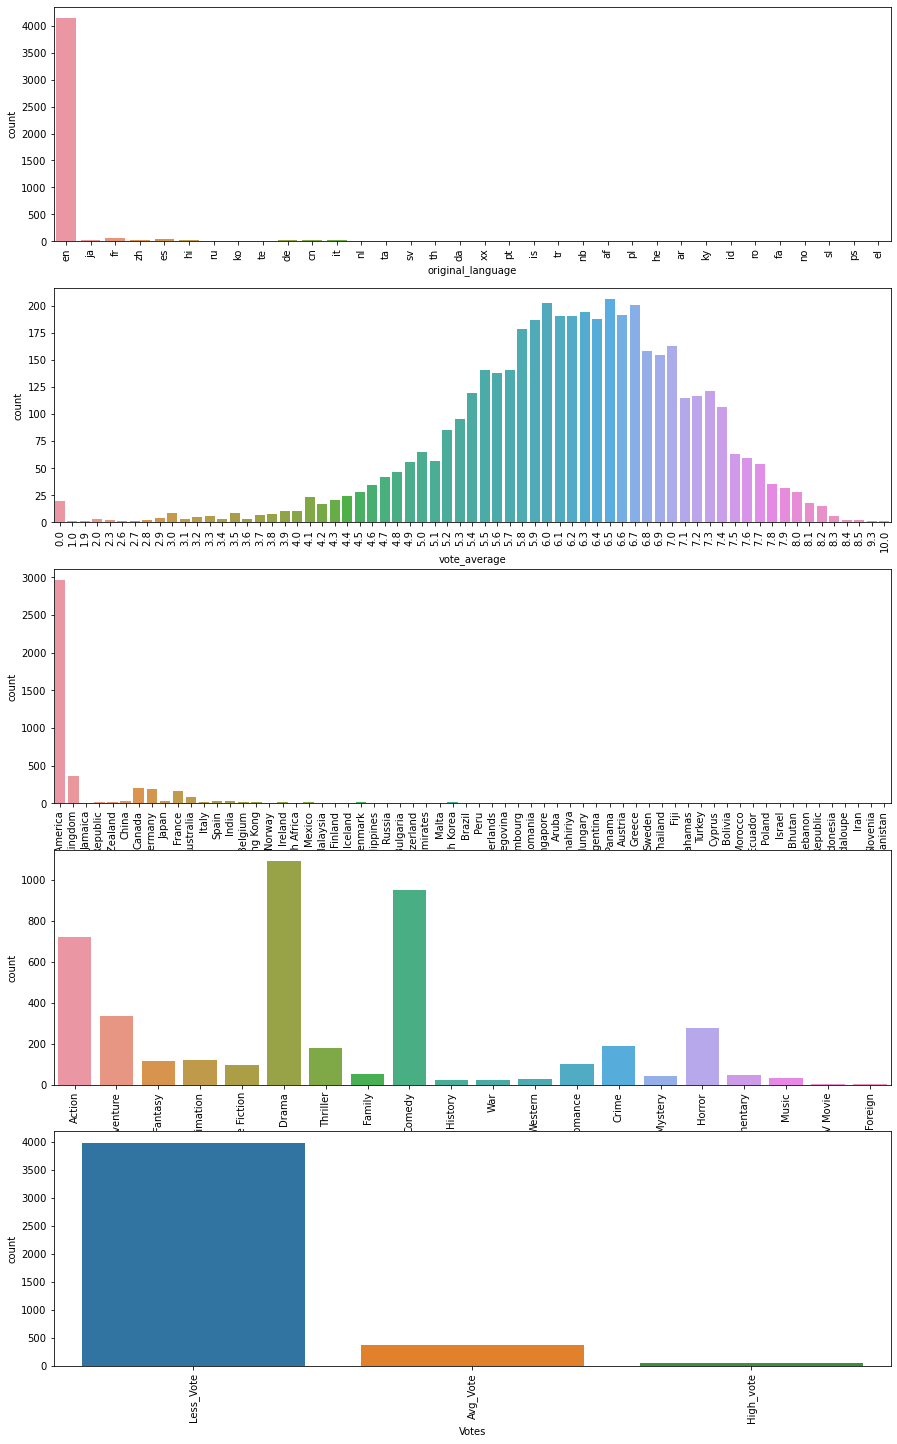

In [35]:
a=movie_df.select_dtypes(['object'])
fig,ax=plt.subplots(5,1,figsize=(15,25))
ax=ax.ravel()
for i,j in zip(cat_var,range(len(a.columns))):
    sns.countplot(data=movie_df,x=i,ax=ax[j])
    ax[j].tick_params(axis='x', rotation=90)
plt.show()

There is Monopoly of english language in TMBD Data set.

Most of the movies rating lies between 5.9 to 7 ratings.

Most of the movies are produced in US.

Drama and comedy movies are listed large number in this data set.

Most of the movies lies in less_voted category.




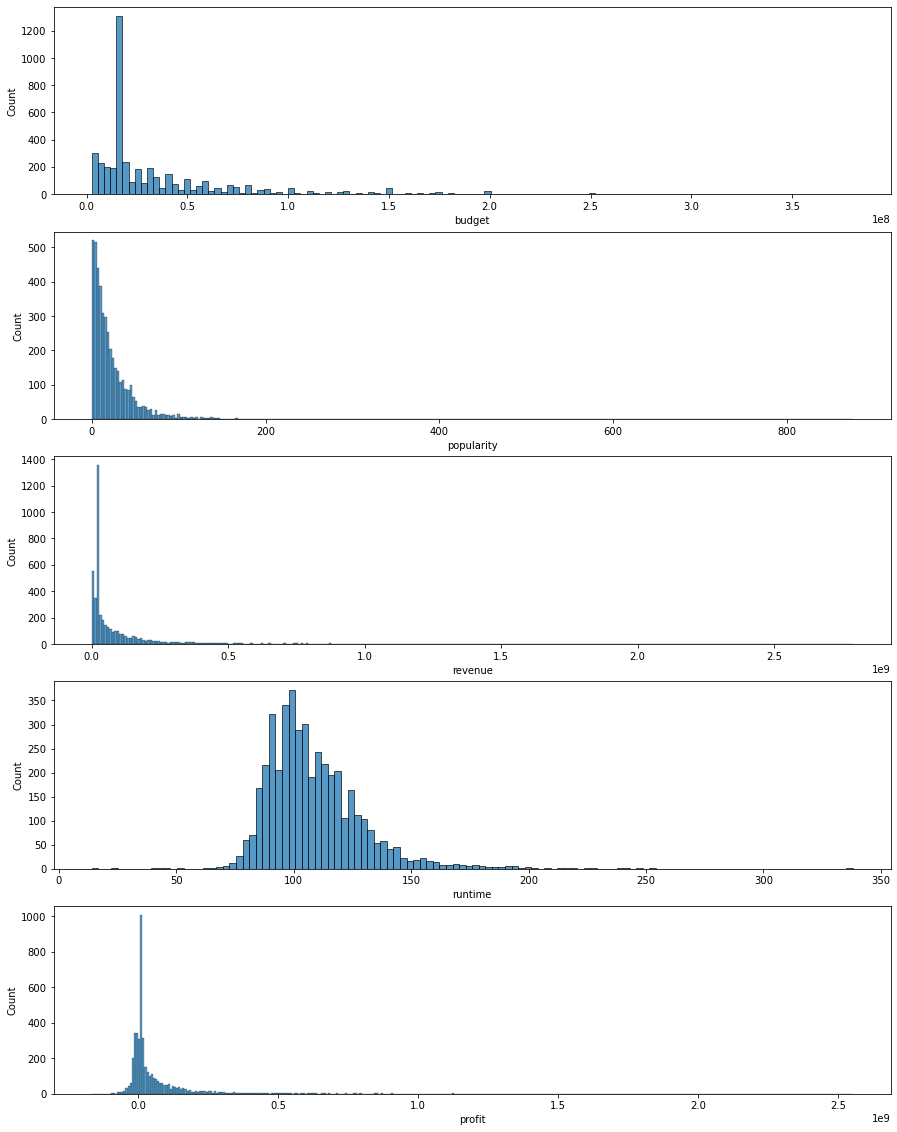

In [36]:
a=movie_df.select_dtypes(['int64','float64'])
fig,ax=plt.subplots(5,1,figsize=(15,20))
a=list(a)
a.remove('vote_average')
ax=ax.ravel()
for i,j in zip(a,range(len(a))):
    sns.histplot(data=movie_df,x=i,ax=ax[j])
plt.show()

Budget are in crores most of the movie lies below the 0.5cr bracket.

Most of the movies are less popular.

Revenue earned by most of the movie is bellow 0.25cr.

Runtime of the movie lies between 90min to 120min.

Most of the movie lies in nor profit no loss list.

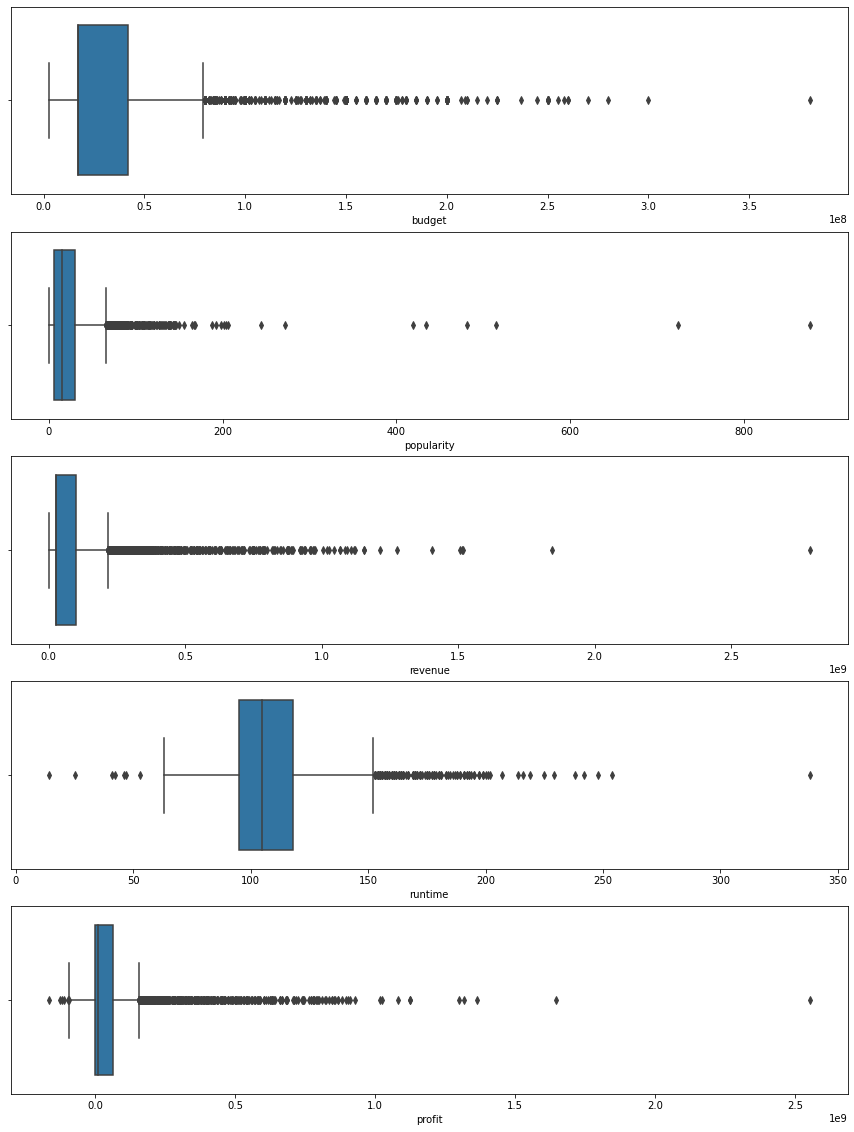

In [37]:
a=movie_df.select_dtypes(['int64','float64'])
fig,ax=plt.subplots(5,1,figsize=(15,20))
a=list(a)
a.remove('vote_average')
ax=ax.ravel()
for i,j in zip(a,range(len(a))):
    sns.boxplot(data=movie_df,x=i,ax=ax[j])
plt.show()

Not Need to execute below code

In [38]:
# #Trateing the outliers to the 90th quartile value
# for i in a:
#     clq = movie_df[i].quantile(0.95)
#     movie_df.loc[movie_df[i] > clq, i] = clq

In [39]:
# a=movie_df.select_dtypes(['int64','float64'])
# for i in a:
#     clq = movie_df[i].quantile(0.25)
#     movie_df.loc[movie_df[i] < clq, i] = clq

In [40]:
# a=movie_df.select_dtypes(['int64','float64'])
# fig,ax=plt.subplots(6,1,figsize=(15,20))
# a=list(a)
# a.remove('vote_average')
# ax=ax.ravel()
# for i,j in zip(a,range(len(a))):
#     sns.boxplot(data=movie_df,x=i,ax=ax[j])
# plt.show()

# Bivariant Analysis

### Catagorical Column

In [41]:
cat_var

['original_language', 'vote_average', 'country', 'Genres', 'Votes']

In [42]:
def comp(col):
    fig,ax=plt.subplots(figsize=(20,5))
    sns.barplot(x=col,y='revenue',data=movie_df)
    plt.xlabel(col)
    plt.ylabel('revenue')
    plt.xticks(rotation=90)

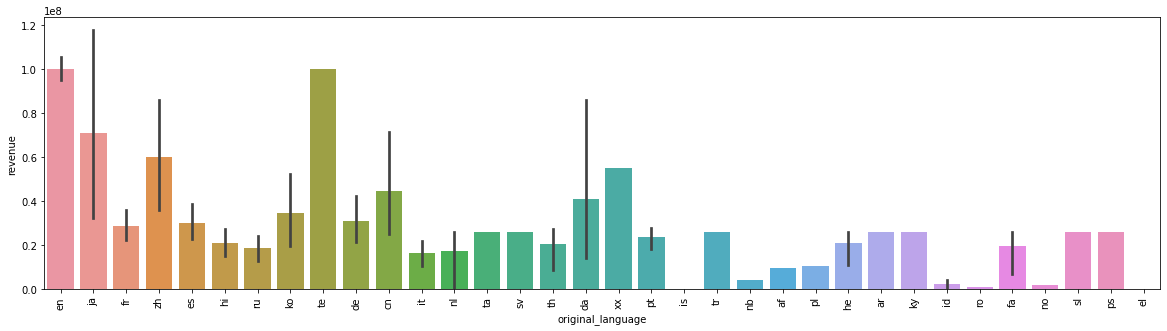

In [43]:
comp('original_language')

Movie produced in te language returns high revenue in box office 

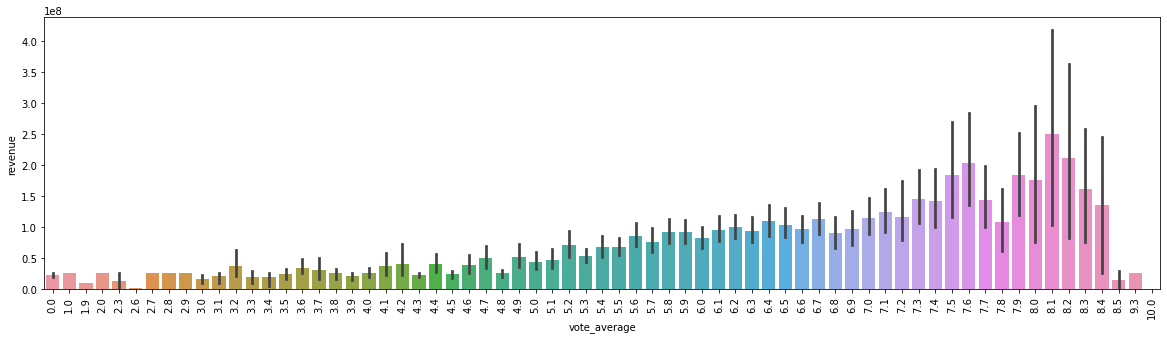

In [44]:
comp("vote_average")

Movie with rating 7.9 to 8.4 gives highest revenue in the box office. 

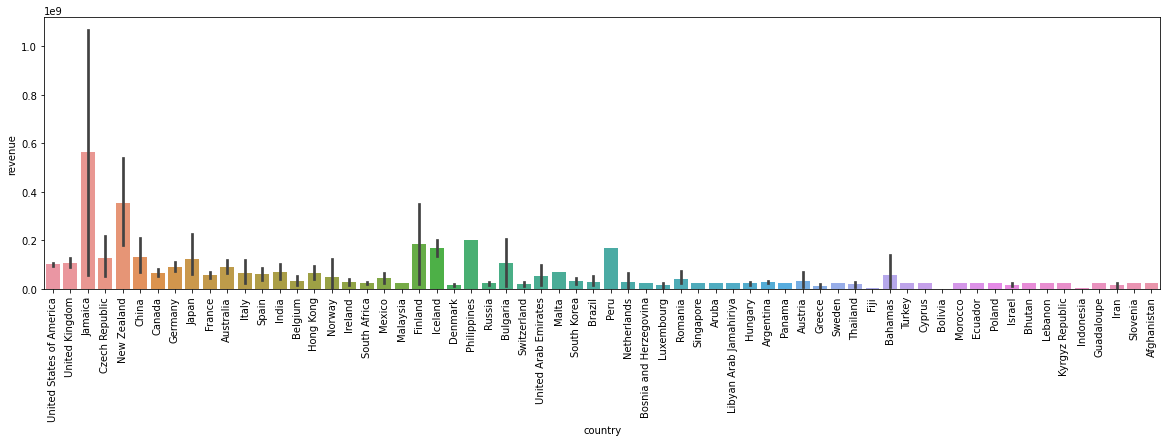

In [45]:
comp('country')

In Zamika the box office collection the highest.

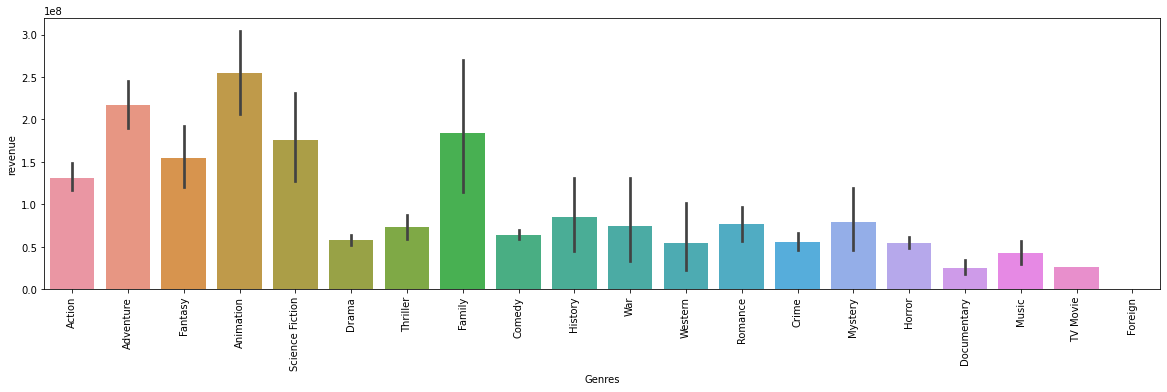

In [46]:
comp('Genres')

Animation movie gives highest revenue to the production company.

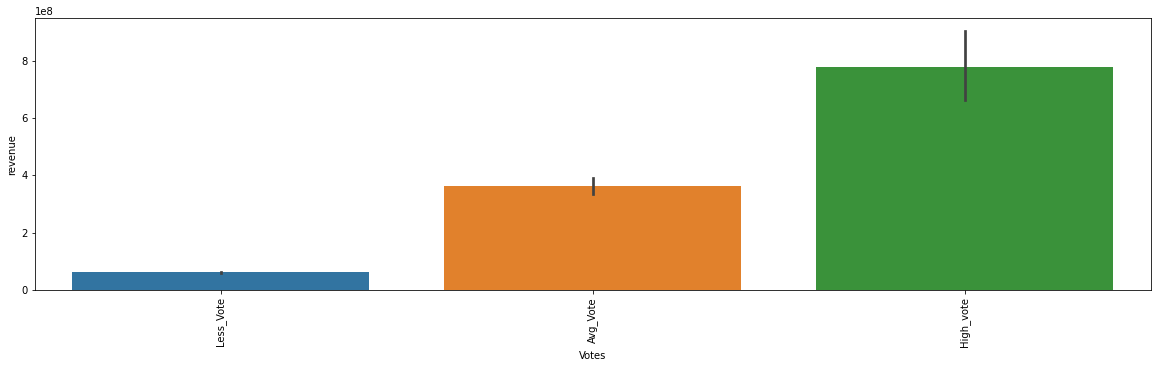

In [47]:
comp('Votes')

Highest voted movies has earned highest revenue.

### Numerical Column

In [48]:
num_var

['title_x',
 'budget',
 'popularity',
 'release_date',
 'revenue',
 'runtime',
 'Lead_Actor',
 'Second_Lead_Actor',
 'Main_Production_House',
 'Director',
 'profit']

In [49]:
def num(col):
    fig,ax=plt.subplots(figsize=(20,5))
    sns.scatterplot(x=col,y='revenue',data=movie_df)
    plt.xlabel(col)
    plt.ylabel('revenue')
    plt.xticks(rotation=30)

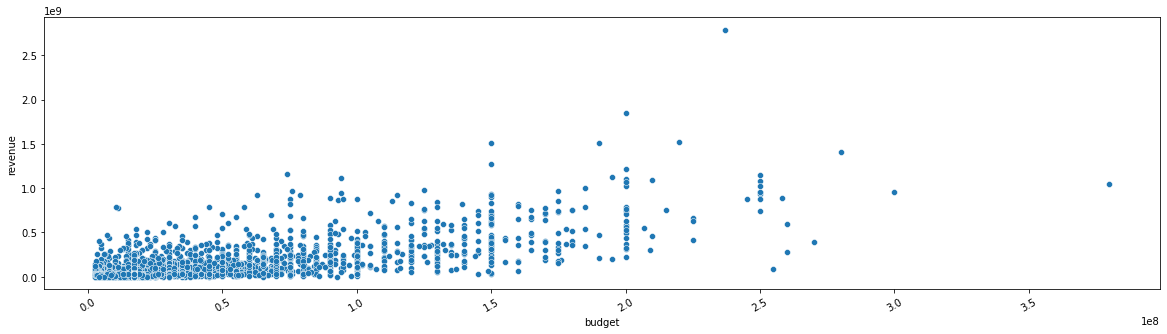

In [50]:
num('budget')

When the budget is low the revenue of the movie is also low in most of the cases.

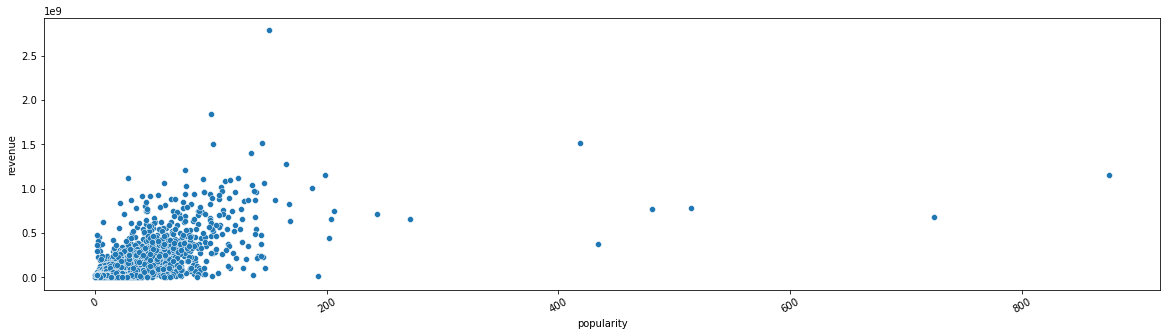

In [51]:
num('popularity')

Less popular movie has earned low revenue.

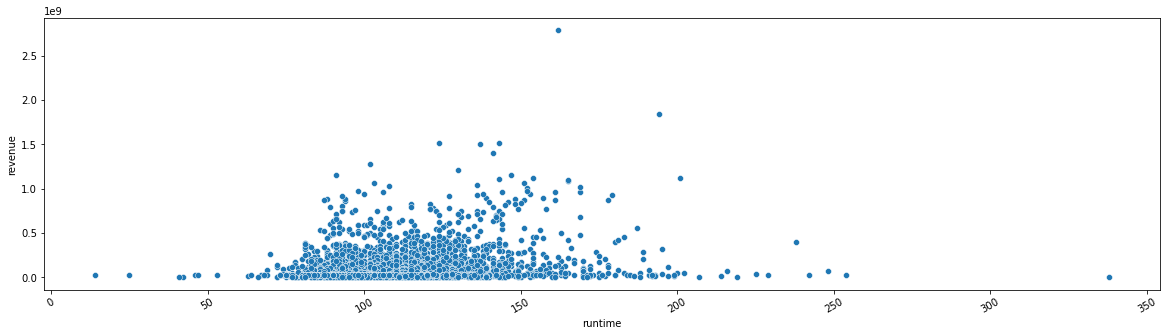

In [52]:
num('runtime')

There is no significant relation drawn from this plot

# Multivaraint Analysis

In [53]:
num_var

['title_x',
 'budget',
 'popularity',
 'release_date',
 'revenue',
 'runtime',
 'Lead_Actor',
 'Second_Lead_Actor',
 'Main_Production_House',
 'Director',
 'profit']

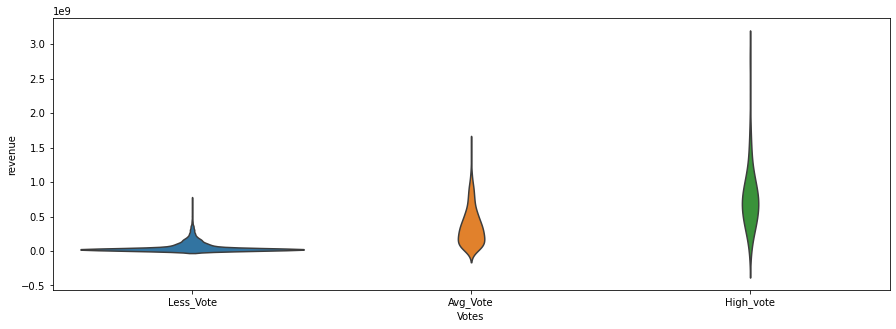

In [54]:
# Generate a violin plot
plt.figure(figsize=(15,5))
sns.violinplot(x='Votes',y='revenue' ,data=movie_df, inner=None)
# sns.swarmplot(x='Genres', y='revenue', data=movie_df, color='white', edgecolor='gray')
plt.show()

There are more number of movies in less vote the spred is wide and also the revenue genereated by movie is also less.

There are aproxemetely good amount of movie in avg_vote the with is not so wide nor so steep and revenue recived is also good.

There are less movie in high vote and the revenue recieved is also high.

<AxesSubplot:xlabel='Genres', ylabel='revenue'>

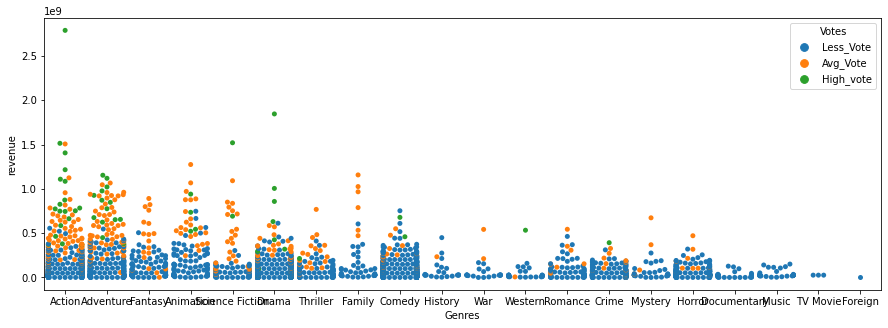

In [55]:
plt.figure(figsize=(15,5))
sns.swarmplot(x='Genres', y='revenue',hue='Votes', data=movie_df, edgecolor='gray')

Action, Adventure, Drama movies are highest rated. Mainly action movie gives the highest revenuein the box office.

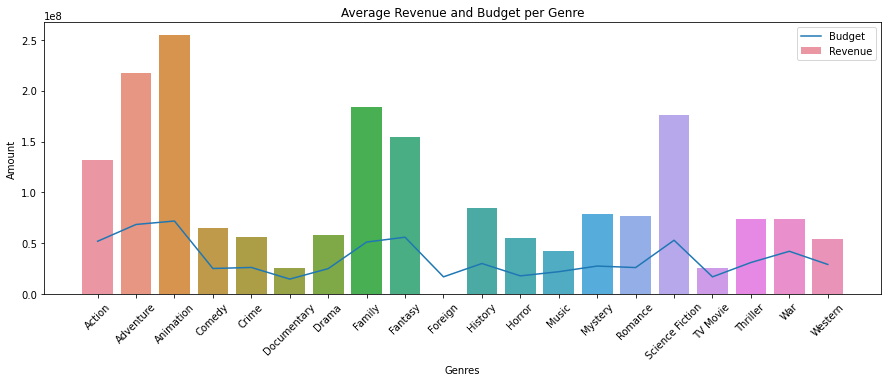

In [56]:
plt.figure(figsize=(15,5))
grouped_df = movie_df.groupby('Genres').mean()

# Plot the line graph
sns.barplot(x=grouped_df.index, y=grouped_df['revenue'], label='Revenue')
sns.lineplot(x=grouped_df.index, y=grouped_df['budget'], label='Budget')

# Set labels and title
plt.xlabel('Genres')
plt.ylabel('Amount')
plt.title('Average Revenue and Budget per Genre')

# Show the legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Animation Movie budget is less but the profit eraned is high.

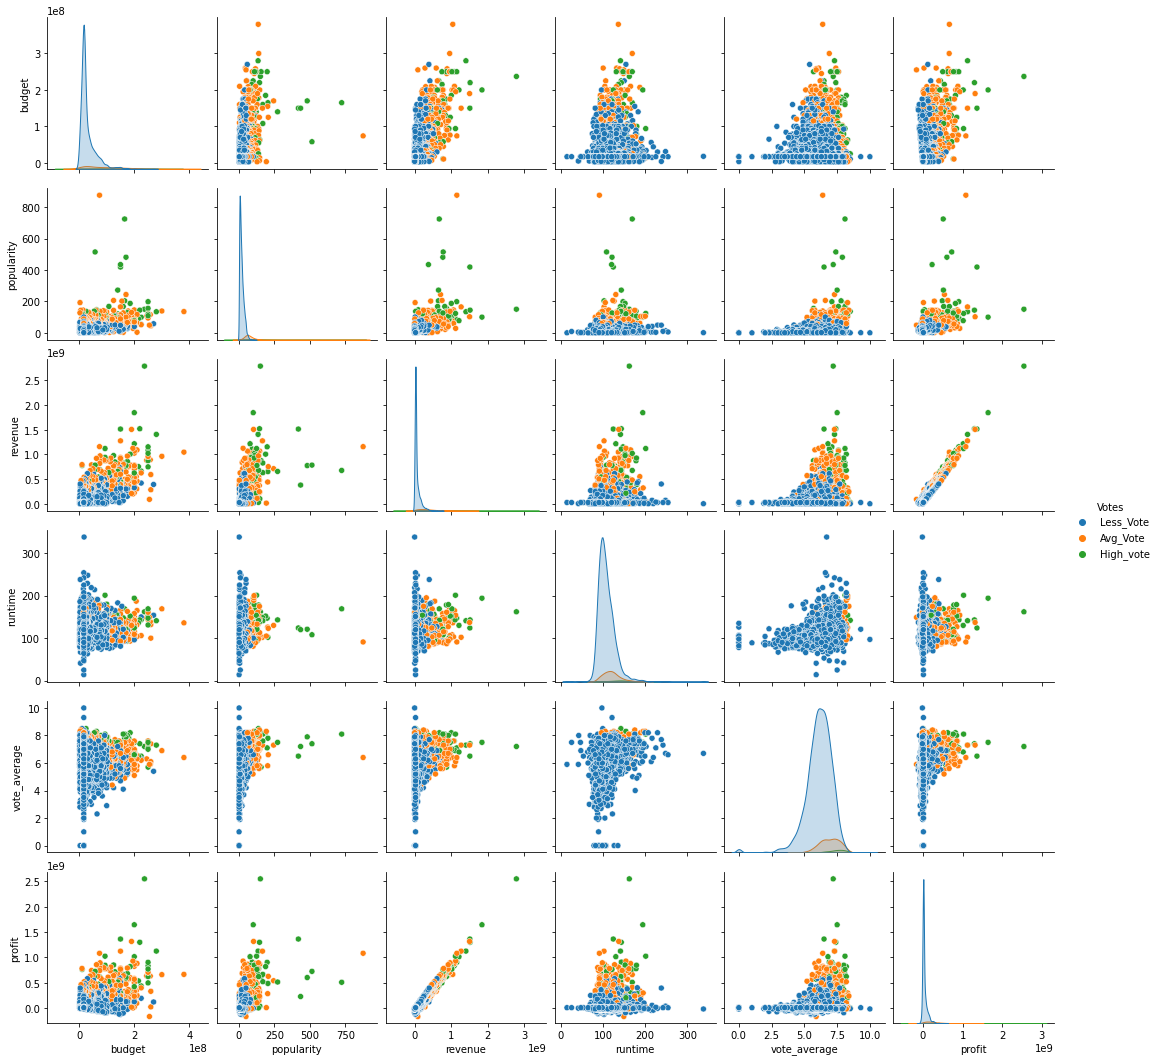

In [57]:
sns.pairplot(movie_df,hue='Votes')

<IPython.core.display.Javascript object>


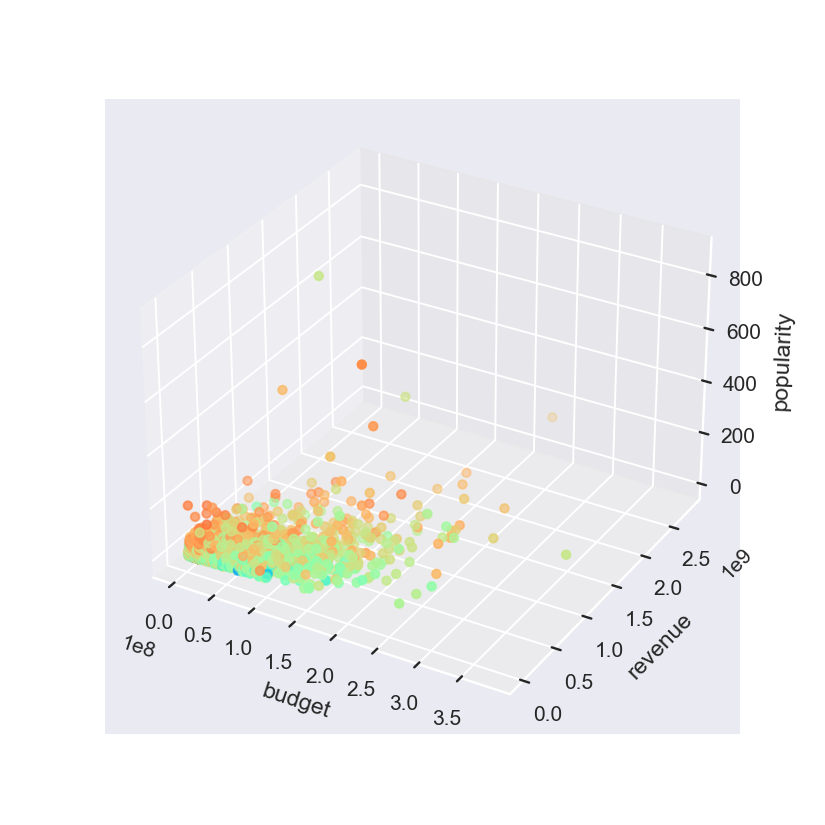

In [101]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
sns.set(style = "darkgrid")

# Generate a 3D scatter plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
scatterx=ax.scatter(movie_df['budget'], movie_df['revenue'], movie_df['popularity'],c=movie_df["vote_average"],cmap='rainbow')

ax.set_xlabel("budget")
ax.set_ylabel("revenue")
ax.set_zlabel("popularity")


# Show the plot
plt.show()


when Budget is high revenue is high when revenue is high popularity of the movie is also high.

In [59]:
# movie_df.to_csv('Cleaned_movie.csv')

In [60]:
movie_df

,title_x,budget,original_language,popularity,release_date,revenue,runtime,vote_average,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes
0,Avatar,237000000,en,150.437577,10-12-2009,2787965087,162.0,7.2,United States of America,Sam Worthington,Zoe Saldana,Ingenious Film Partners,Action,James Cameron,2550965087,High_vote
1,Pirates of the Caribbean: At World's End,300000000,en,139.082615,19-05-2007,961000000,169.0,6.9,United States of America,Johnny Depp,Orlando Bloom,Walt Disney Pictures,Adventure,Gore Verbinski,661000000,Avg_Vote
2,Spectre,245000000,en,107.376788,26-10-2015,880674609,148.0,6.3,United Kingdom,Daniel Craig,Christoph Waltz,Columbia Pictures,Action,Sam Mendes,635674609,Avg_Vote
3,The Dark Knight Rises,250000000,en,112.312950,16-07-2012,1084939099,165.0,7.6,United States of America,Christian Bale,Michael Caine,Legendary Pictures,Action,Christopher Nolan,834939099,High_vote
4,John Carter,260000000,en,43.926995,07-03-2012,284139100,132.0,6.1,United States of America,Taylor Kitsch,Lynn Collins,Walt Disney Pictures,Action,Andrew Stanton,24139100,Avg_Vote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,Bang,17000000,en,0.918116,09-09-1995,25871834,98.0,6.0,United States of America,Darling Narita,Peter Greene,Asylum Films,Drama,Ash Baron-Cohen,8871834,Less_Vote
4796,Primer,17000000,en,23.307949,08-10-2004,424760,77.0,6.9,United States of America,Shane Carruth,David Sullivan,Thinkfilm,Science Fiction,Shane Carruth,-16575240,Less_Vote
4798,El Mariachi,17000000,es,14.269792,04-09-1992,2040920,81.0,6.6,Mexico,Carlos Gallardo,Jaime de Hoyos,Columbia Pictures,Action,Robert Rodriguez,-14959080,Less_Vote
4800,"Signed, Sealed, Delivered",17000000,en,1.444476,13-10-2013,25871834,120.0,7.0,United States of America,Eric Mabius,Kristin Booth,Front Street Pictures,Comedy,Scott Smith,8871834,Less_Vote


In [61]:
movie_df.runtime.min()

14.0